# Analysis of the CaK. line
flare 6/9/2017

Remark that there are two flares here 

# start with flare of 11:55:47 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
# %matplotlib inline
from astropy.io import fits as f
import sunpy
from scipy.io import readsav
import cocopy as cp
from ISPy.io import solarnet
import sunpy.map
import astropy.units as u
from scipy.io import readsav as rs
from PIL import Image, ImageEnhance
import use_nessi as un
from importlib import reload
import matplotlib.animation as animation
from PIL import Image
from scipy.interpolate import interp1d
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.collections import PolyCollection


# functies uittesten met CaK

In [2]:
reload(un)
# And now the running commands
openfile="nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits"
header= f.getheader(un.get_file_path_fits(openfile))
header = un.add_enters(str(header), length_row=79)
print(header)




SIMPLE  =                    T / Written by IDL:  Tue Mar 14 15:39:37 2023     
 BITPIX  =                  -32 /                                               
 NAXIS   =                    5 / Number of data axes                           
 NAXIS1  =                 1258 / Number of positions along axis 1              
 NAXIS2  =                 1713 / Number of positions along axis 2              
 NAXIS3  =                   20 / Number of positions along axis 3              
 NAXIS4  =                    1 / Number of positions along axis 4              
 NAXIS5  =                  394 / Number of positions along axis 5              
 EXTEND  =                    T / The file has extension(s).                    
 EXTNAME = 'Main'                                                               
 DATE    = '2023-03-30T16:49:48' / Creation UTC date of FITS header             
 VAR_KEYS= 'VAR-EXT-PRSTEP1;PRSTEP1,VAR-EXT-PRPARA1;PRPARA1,VAR-EXT-PRVER1;PRVE&
'CONTINUE  'R1,VAR-EXT-PRREF1

for the spectral positions of the data: see harps paper! We calculate these here:

In [3]:
peak = 3933.663
D = np.array([-1.00, -0.85, -0.65, -0.55, -0.45, -0.35, -0.25, -0.15, -0.07, 0, 0.07, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.85, 1.00, 0 ])
wavl = D+peak
wavl[-1] = 4000
np.save('line_data/spectfile3950_.npy', wavl)
wavl, np.shape(wavl)

(array([3932.663, 3932.813, 3933.013, 3933.113, 3933.213, 3933.313,
        3933.413, 3933.513, 3933.593, 3933.663, 3933.733, 3933.813,
        3933.913, 3934.013, 3934.113, 3934.213, 3934.313, 3934.513,
        3934.663, 4000.   ]),
 (20,))

The time series are also not yet given. Calcultate them from: 
START+'2017-09-06T11:56:28.03739' END= '2017-09-06T12:39:22.07020' in units [minutes]

found NAN
Boundary
Blue=Outside, yellow=Inside


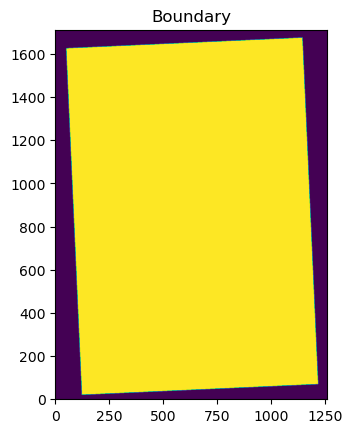

If there is still boundary left to be excluded, call self.second_boundary()
The next thing to do is to initalise the filters. Use update_filters(self, MeanSd, form='normal')


In [4]:
reload(un)
CaK= un.SST_data('nb_3950_2017-09-06T11_55_49_11_55_49=6-399_mixed_corrected_im.fits',
                   'line_data/spectfile3950_.npy','line_data/TIME_CAK17',name_of_line='CaK17')
sst_data= CaK

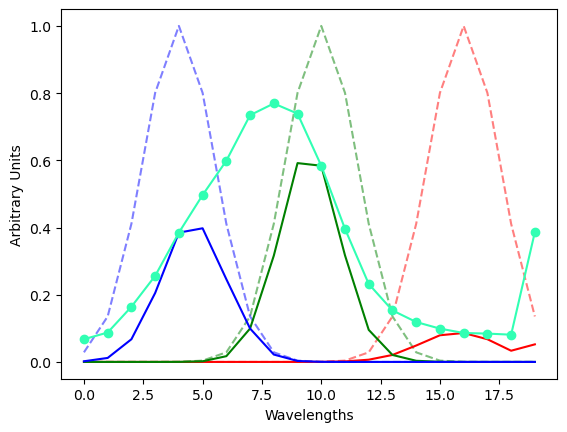

In [5]:
# %matplotlib inline
CaK.update_filters([[16,1.5], [10,1.5], [4,1.5]])
CaK.plot_filt(880,900)

[1.19040143 1.26812708 1.50927174 1.7512275  2.15332985 2.87123489
 4.10024643 5.98299742 7.10189819 7.26941013 6.80271769 5.7030468
 4.14953756 3.11497259 2.42101288 2.04067707 1.78958929 1.49571538
 1.37350774 4.37326288]


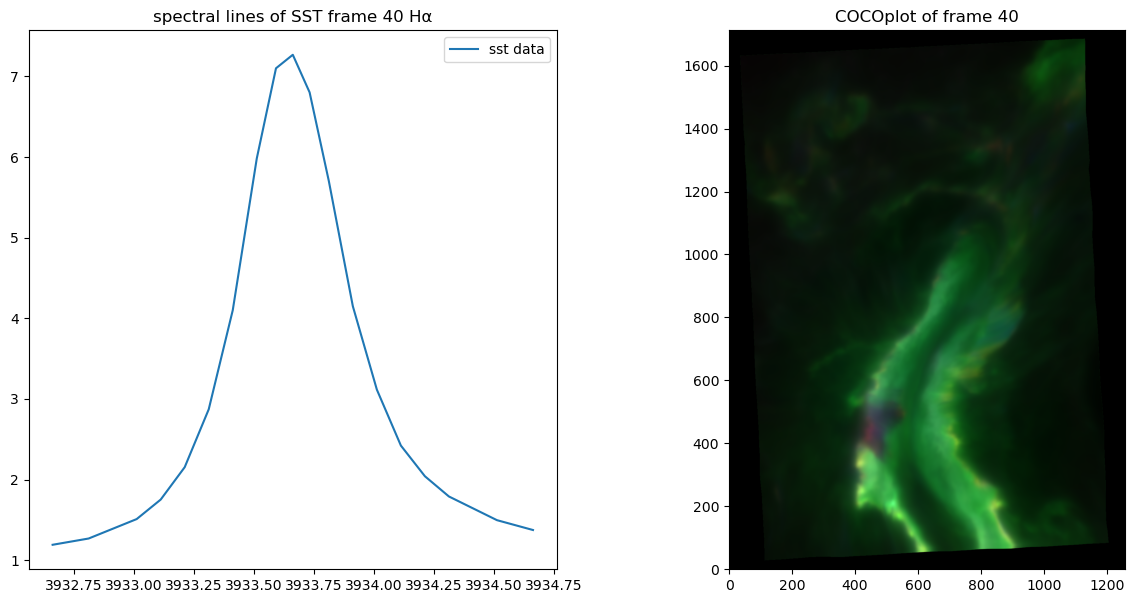

In [6]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(15, 7))
# plt.title('frame 40 jeweet')

frame = 40
sst_data.ccp_frame(frame,Show=False)


ax[0].set_title("spectral lines of SST frame "+str(frame)+" H\u03B1")
sst_data.frame_integrated_spect(frame)
print(sst_data.av_spect)
ax[0].plot(sst_data._wavel[:-1], sst_data.av_spect[:-1], label='sst data')
ax[0].legend()
ax[1].imshow(Image.fromarray(sst_data.current_ccp), origin='lower')
ax[1].set_title("COCOplot of frame "+str(frame))
plt.show()

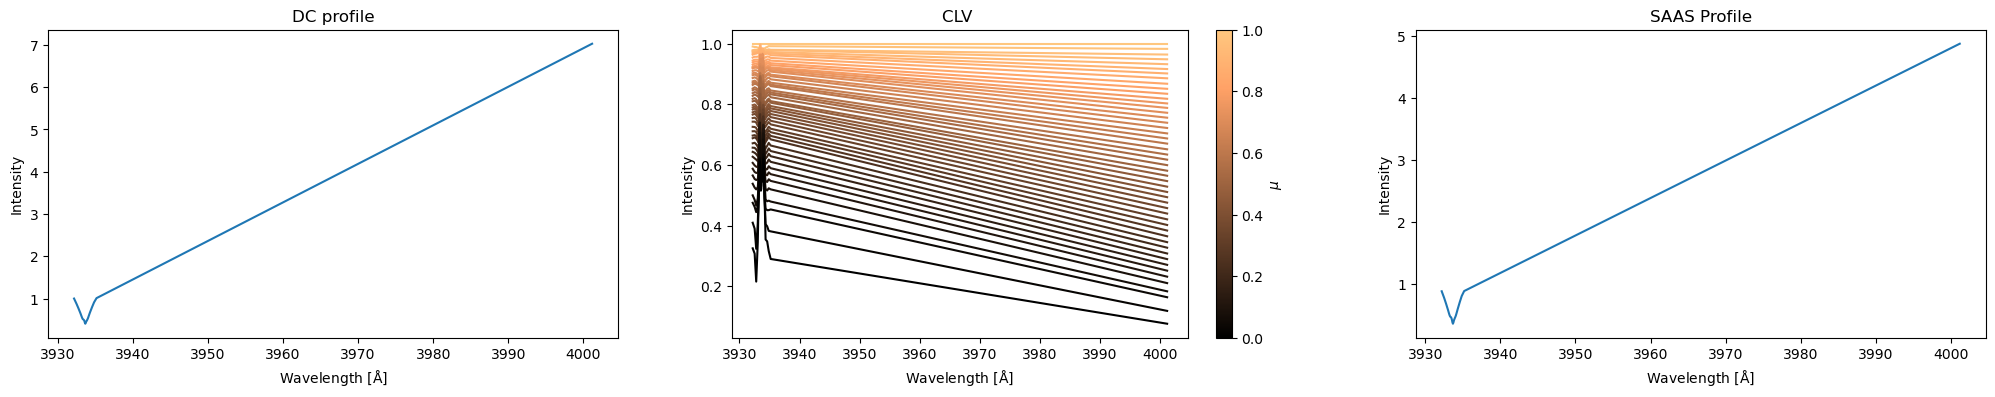

3933.7251200421415 [3932.19676006 3932.52204006 3932.78196005 3933.04188005 3933.10724005
 3933.17260005 3933.23796005 3933.30180005 3933.36716005 3933.43252005
 3933.49788004 3933.56172004 3933.62708004 3933.69244004 3933.75780004
 3933.82316004 3933.88700004 3933.95236004 3934.01772004 3934.08308004
 3934.14692004 3934.21228004 3934.27764004 3934.34300003 3934.60292003
 3934.86284003 3935.18812002 4001.14743998] [[1.         0.87620153 0.76842093 ... 0.91159718 1.00986771 7.02642874]
 [0.99070422 0.86673757 0.75995494 ... 0.90441404 1.00158354 6.90696614]
 [0.97648119 0.85636997 0.74948236 ... 0.89316074 0.98976455 6.77536039]
 ...
 [0.47531055 0.4044703  0.34149005 ... 0.41114552 0.45777378 1.1500991 ]
 [0.40946949 0.34169658 0.24846519 ... 0.34877113 0.38476981 0.83355861]
 [0.32502657 0.2695266  0.16539272 ... 0.28802065 0.29277341 0.53603683]]


In [7]:
import use_nessi3 as un3
theor_line = un3.linestudier('final_3934.npy', atlas=None, nr=101, neglect_atlas=True)
# theor_line.define_point_at_continuum(-1)
print(np.median(theor_line.sst_wav), (theor_line.sst_wav), theor_line.sst_int)


## Calculating the mu !!!!! 

(394, 1, 20, 1713, 1258)
The frame is centered at (524.6951755526969, -235.1869288002494)
COCOPLOT at  t=11:56:30 UT (frame number 0 )


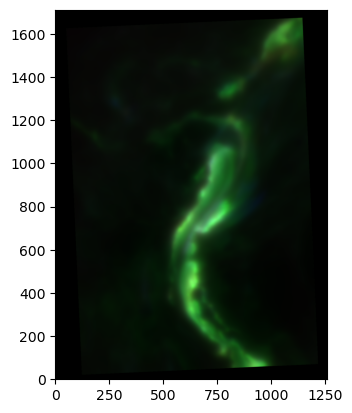

[500.87502555269697, 548.5153255526969, -267.62932880024937, -202.7445288002494]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.799966045035531 for timeframe 0
succesfully saved.
The frame is centered at (529.4665422492486, -232.5215139851784)
COCOPLOT at  t=12:17:47 UT (frame number 200 )


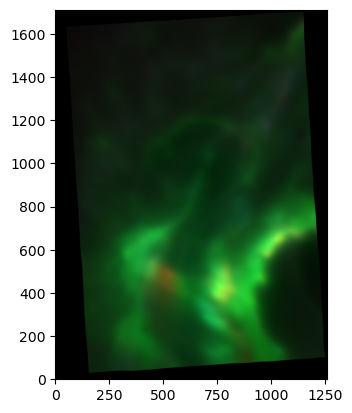

[505.64639224924866, 553.2866922492486, -264.96391398517835, -200.0791139851784]
AVERAGE MU: The average $\mu$ wheigthed over the field of view is 0.7973933717428934 for timeframe 200
We take average mu to be  0.7986797083892122
Mu also set to the theoretic nessi line.


(0.7986797083892122, array([10], dtype=int64))

In [8]:

print(np.shape(sst_data.datacube))
mu= sst_data.set_mu(theor_line, number_of_last_frame=200)
x = np.abs(theor_line.sst_mu-mu)
index_mu = np.where(x == np.min(x))[0]
mu, index_mu

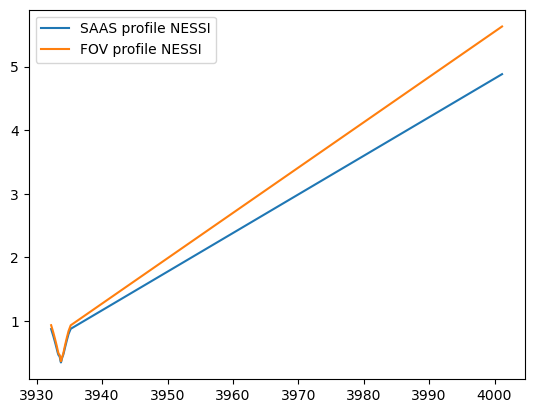

In [9]:
theor_line.set_fov( sst_data.xx, sst_data.yy, CaK.boundary, sr=959.63)

## Finding a suitable quiet sun patch
# In this case there doesn't realy exists a goed so we use the point at the continuum

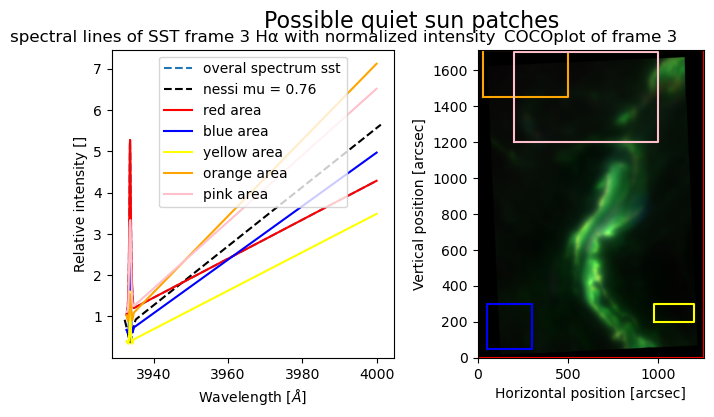

In [10]:
X = [ [(0, 1257 ), (0,1712)],[(50,300), (50,300)], [(980, 1200), (200, 300)] , [(30,500), (1450, 1710)], [(200, 1000), (1200,1700)]]# max x: 1258, y: 1713
# %matplotlib widget
# %matplotlib inline
frame = 3

CaK.possible_quiet_sun_patches(frame, theor_line , X=X)

In [11]:
# the chosen quiet sun patch is 
color_wanted_patch = 'orange'
# choose from
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']

the edges of the patch are denoted by the xlim: (30, 500) and ylim: (1450, 1710)


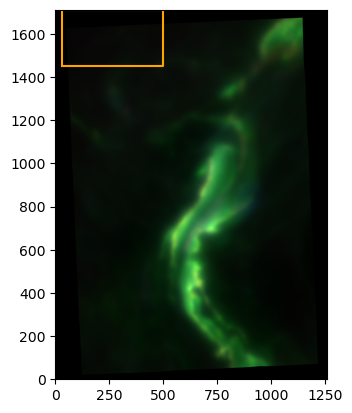

The quiet sun is pick at x (515.6709422492486, -205.1008639851784) with average              mu 0.8158182602288352
[[0.52810291 0.5281424  0.5281819  ... 0.54654679 0.54658628 0.54662577]
 [0.52810291 0.5281424  0.5281819  ... 0.54654679 0.54658628 0.54662577]
 [0.52810291 0.5281424  0.5281819  ... 0.54654679 0.54658628 0.54662577]
 ...
 [0.52810291 0.5281424  0.5281819  ... 0.54654679 0.54658628 0.54662577]
 [0.52810291 0.5281424  0.5281819  ... 0.54654679 0.54658628 0.54662577]
 [0.52810291 0.5281424  0.5281819  ... 0.54654679 0.54658628 0.54662577]] [[-0.21884363 -0.21884363 -0.21884363 ... -0.21884363 -0.21884363
  -0.21884363]
 [-0.21880414 -0.21880414 -0.21880414 ... -0.21880414 -0.21880414
  -0.21880414]
 [-0.21876464 -0.21876464 -0.21876464 ... -0.21876464 -0.21876464
  -0.21876464]
 ...
 [-0.20869357 -0.20869357 -0.20869357 ... -0.20869357 -0.20869357
  -0.20869357]
 [-0.20865408 -0.20865408 -0.20865408 ... -0.20865408 -0.20865408
  -0.20865408]
 [-0.20861458 -0.20861458 -0.20

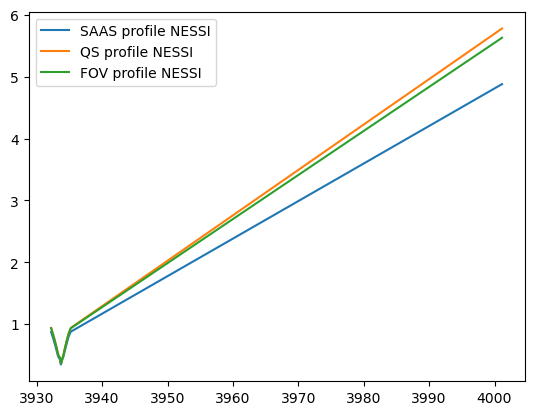

{'frame': 3, 'xlim': (30, 500), 'ylim': (1450, 1710), 'color': 'orange'}

In [12]:
colors=['red', 'blue', 'yellow', 'orange', 'pink', 'purple', 'limegreen', 'darkgreen', 'gray']
ind = int(colors.index(color_wanted_patch))


xlim, ylim = X[ind]
print('the edges of the patch are denoted by the xlim:', xlim, 'and ylim:', ylim)
reload(un)
CaK.set_quiet_sun(frame, xlim=xlim, ylim=ylim, show=False, color=color_wanted_patch)
plt.show()
theor_line.set_quiet_sun(xlim=xlim, ylim=ylim, show=True)
CaK.quiet_sun

the theta fit is  [0, 0, 1.2306107488839422]


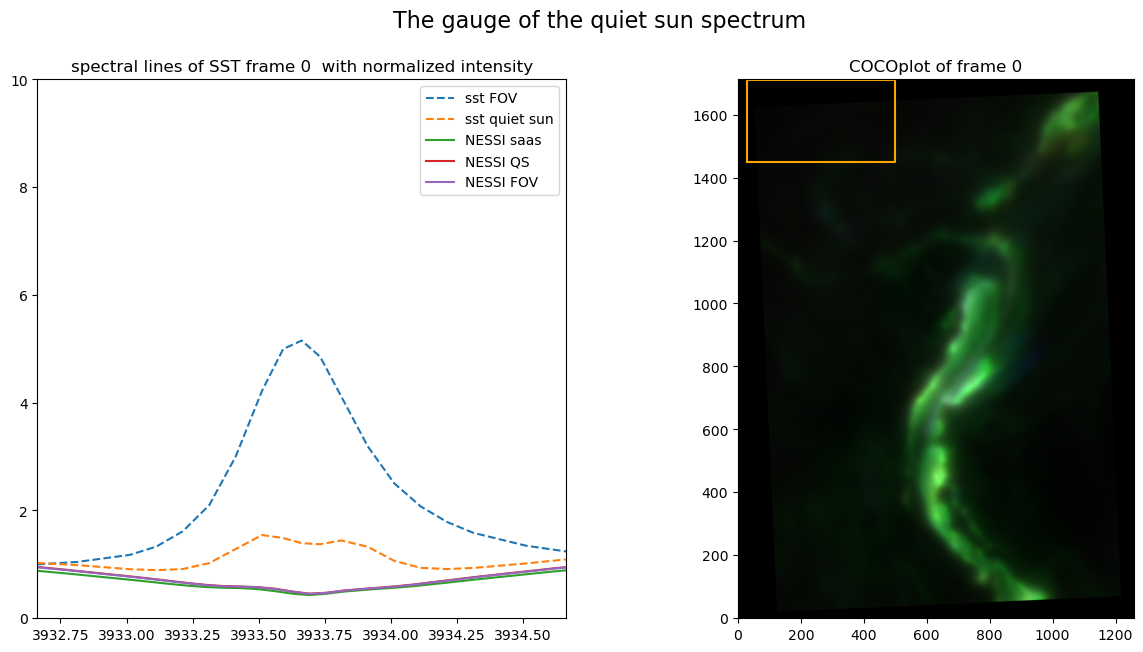

In [13]:
reload(un3)
un3.fit_qs_to_NESSI_cont_point(theor_line, CaK, xshift=0)

In [14]:
sst_data._time

array(['11:56:30.725980', '11:56:36.968460', '11:56:43.976180',
       '11:56:50.218680', '11:56:56.551040', '11:57:02.988570',
       '11:57:09.306100', '11:57:15.878300', '11:57:22.600650',
       '11:57:29.323390', '11:57:36.181180', '11:57:42.618700',
       '11:57:49.161230', '11:57:55.418550', '11:58:02.050910',
       '11:58:09.028530', '11:58:15.631250', '11:58:21.903380',
       '11:58:28.161010', '11:58:34.793220', '11:58:41.260800',
       '11:58:47.803410', '11:58:53.970270', '11:59:00.633490',
       '11:59:06.950420', '11:59:13.657900', '11:59:20.365750',
       '11:59:27.493360', '11:59:33.660830', '11:59:39.873350',
       '11:59:46.610680', '11:59:52.928000', '11:59:59.125460',
       '12:00:05.292430', '12:00:11.625380', '12:00:17.792420',
       '12:00:24.155090', '12:00:30.952630', '12:00:37.134870',
       '12:00:43.317350', '12:00:49.499550', '12:00:55.906830',
       '12:01:02.464440', '12:01:08.706850', '12:01:14.964310',
       '12:01:21.536760', '12:01:27.7038

In [15]:
un.get_TIME(sst_data)

array([ 0.        ,  0.1       ,  0.21666667,  0.33333333,  0.43333333,
        0.53333333,  0.65      ,  0.75      ,  0.86666667,  0.98333333,
        1.1       ,  1.2       ,  1.31666667,  1.41666667,  1.53333333,
        1.65      ,  1.75      ,  1.85      ,  1.96666667,  2.06666667,
        2.18333333,  2.28333333,  2.38333333,  2.5       ,  2.6       ,
        2.71666667,  2.83333333,  2.95      ,  3.05      ,  3.15      ,
        3.26666667,  3.36666667,  3.48333333,  3.58333333,  3.68333333,
        3.78333333,  3.9       ,  4.        ,  4.11666667,  4.21666667,
        4.31666667,  4.41666667,  4.53333333,  4.63333333,  4.73333333,
        4.85      ,  4.95      ,  5.05      ,  5.15      ,  5.26666667,
        5.36666667,  5.46666667,  5.58333333,  5.68333333,  5.78333333,
        5.88333333,  5.98333333,  6.1       ,  6.2       ,  6.3       ,
        6.41666667,  6.51666667,  6.61666667,  6.73333333,  6.83333333,
        6.93333333,  7.03333333,  7.13333333,  7.25      ,  7.35

# saving Important small files for further analysis
We want the following:

* FOV_spectrum
* quiet_sun spectrum (nessi of qs)
* Full disk profile

The peak occurs at frame [50] at time t=['12:01:52 UT.
The SST data runs from t=11:56:30 UT to t=12:39:25 UT.
The areafactor for THIS flare is 0.0008723344738709882 compared to 60**2/np.pi/959.63**2 = 0.0012443569999152702.        
However normaly this should be alike and since the gauge is bij the Quiet sun, the conversion should be oké.        
Percentage: 70.1%.


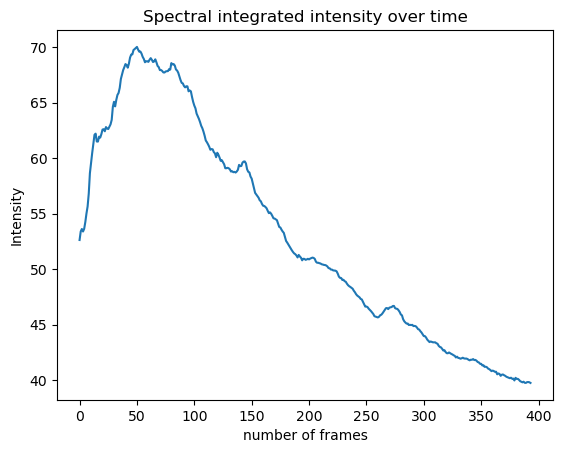

In [16]:
reload(un)
un.save_for_further_analysis(sst_data, theor_line)


# Movie Making

[0, 0, 1.2306107488839422]
Intensity limit calculation for first time.
Intensity limit is saved.
Frame: 0, 11:56:30.725980, total number of frames: 394 


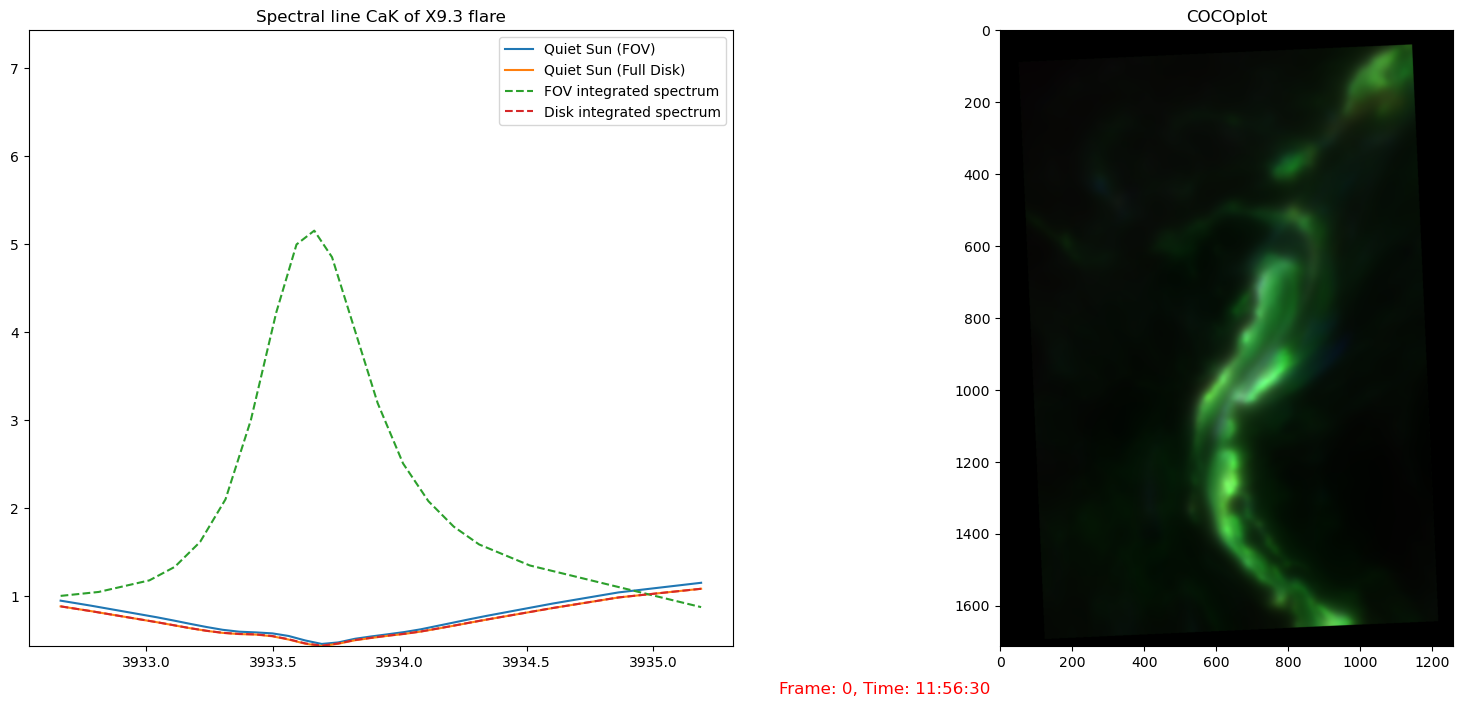

In [17]:
# fill in here all arguments
theor_line = theor_line
sst_data = CaK
name_of_flare = "X9.3"
name_of_line = "CaK"

un.Movie_making(theor_line, sst_data, name_of_flare, name_of_line)


In [ ]:
exit()

: 